In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data for all the different movies
rt_movies_df = pd.read_csv('rotten_tomatoes_movies.csv')

# Data for all the different critic reviews
rt_critic_reviews_df = pd.read_csv('rotten_tomatoes_critic_reviews_50k.csv')


# Combine the two dataframes into one
combined_df = pd.merge(rt_movies_df, rt_critic_reviews_df, on='rotten_tomatoes_link')
# print(combined_df.head(5))
rotten_tomatoes_combined = pd.DataFrame.to_csv(combined_df)

In [2]:
'''
---- Movie Info ----
Rotten_Tomatoes_Link: unique id of the move
Movie_Title: name of the movie
Movie_Info: description of the movie
critics_consensus: constant description of the movie by critics
content_rating: rating (PG, PG-13, R, etc)
Genres: genres of the movie
Directors: directors of the movie
Authors: authors of the movie
Actors: actors of the movie
Original_Release_Date: original release date
Streaming_Release_Date: streaming release date
Runtime: runtime of the movie
Production_Company: production company of the movie
Tomatometer_Status: The rating of what the movie got (fresh, rotten, etc)
Tomatometer_Rating: The rating of the movie
Tomatometer_Count: number of professional critic reviews that are positive
Audience_Status: The rating of what the movie got according to audience(fresh, rotten, etc)
Audience_Rating: The rating of the movie according to audience
Audience_Count: number of audience reviews that are positive
Tomatometer_Top_Critics_Count: number of established critics that have reviewed the movie
Tomatometer_Fresh_Critics_Count: number of positive reviews by critics
Tomatometer_Rotten_Critics_Count: number of negative reviews by critics
------Individual Critic Info----
Critic_Name: Critic reviewing the movie
Top_Critic: True if person is an established critic
Publisher_Name: publisher of the critic
Review_Type: Review that the critic gave
Review_Score: critic's score
Review_Date: critic's review date
Review_Content: Description by the critic
'''

"\n---- Movie Info ----\nRotten_Tomatoes_Link: unique id of the move\nMovie_Title: name of the movie\nMovie_Info: description of the movie\ncritics_consensus: constant description of the movie by critics\ncontent_rating: rating (PG, PG-13, R, etc)\nGenres: genres of the movie\nDirectors: directors of the movie\nAuthors: authors of the movie\nActors: actors of the movie\nOriginal_Release_Date: original release date\nStreaming_Release_Date: streaming release date\nRuntime: runtime of the movie\nProduction_Company: production company of the movie\nTomatometer_Status: The rating of what the movie got (fresh, rotten, etc)\nTomatometer_Rating: The rating of the movie\nTomatometer_Count: number of professional critic reviews that are positive\nAudience_Status: The rating of what the movie got according to audience(fresh, rotten, etc)\nAudience_Rating: The rating of the movie according to audience\nAudience_Count: number of audience reviews that are positive\nTomatometer_Top_Critics_Count: num

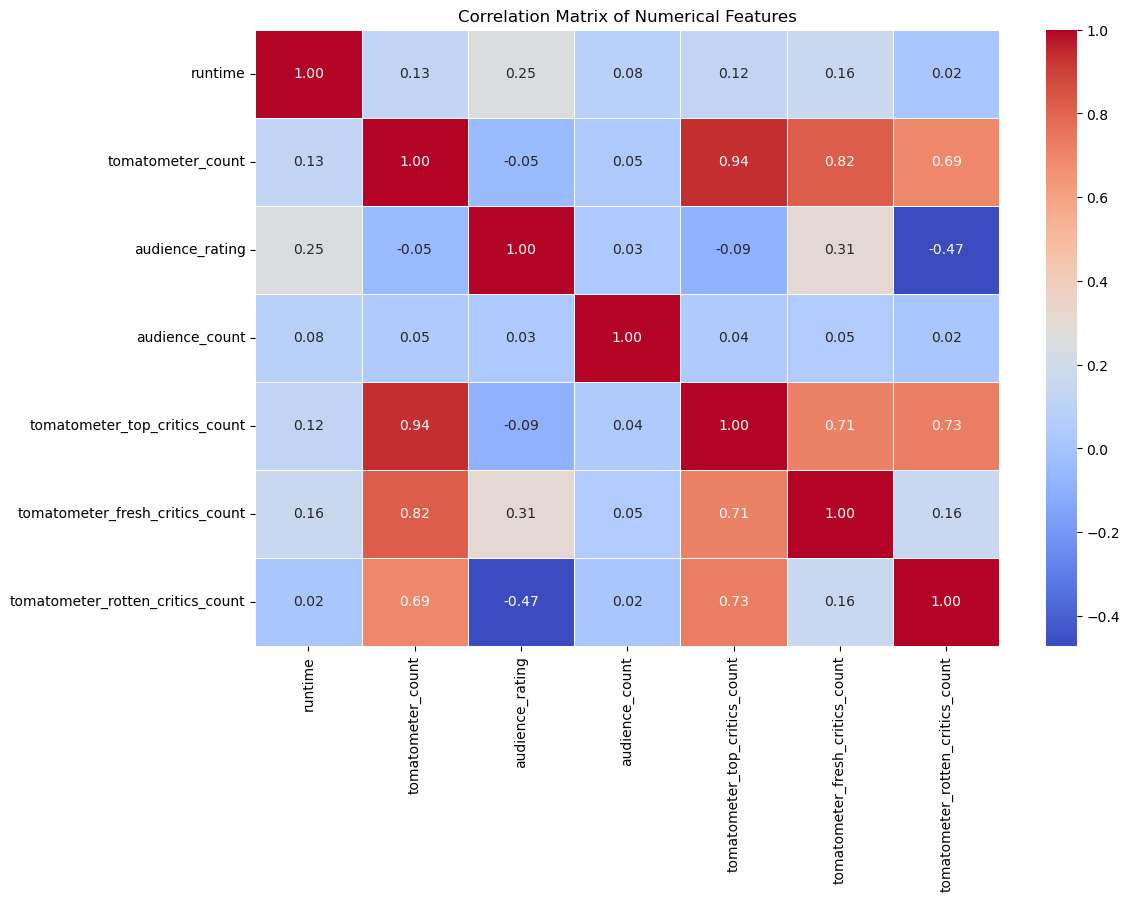

In [3]:
numerical_features = [
    'runtime', 'tomatometer_count',
    'audience_rating', 'audience_count', 'tomatometer_top_critics_count',
    'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'
]

correlation_matrix = combined_df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [4]:
combined_df.head(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,43,73,76,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:
df_genres = combined_df['genres'].str.get_dummies(',')
all_genres = df_genres.columns.to_list()
all_genres = [genre.strip() for genre in all_genres]
all_genres = list(set(all_genres))
all_genres.sort()
print(all_genres)

['Action & Adventure', 'Animation', 'Art House & International', 'Classics', 'Comedy', 'Cult Movies', 'Documentary', 'Drama', 'Faith & Spirituality', 'Horror', 'Kids & Family', 'Musical & Performing Arts', 'Mystery & Suspense', 'Romance', 'Science Fiction & Fantasy', 'Special Interest', 'Sports & Fitness', 'Television', 'Western']


In [7]:
df_test = pd.read_csv('rotten_tomatoes_combined.csv')

df_test['original_release_date'] = pd.to_datetime(df_test['original_release_date'])
df_test['streaming_release_date'] = pd.to_datetime(df_test['streaming_release_date'])

df_test['release_year'] = df_test['original_release_date'].dt.year

genres = df_test['genres'].str.get_dummies(sep=', ')
print(genres.columns)

content_rating_dummies = pd.get_dummies(df_test['content_rating'], prefix='rating')

numerical_features = df_test[['audience_rating', 'audience_count', 'runtime', 'release_year']]
features = pd.concat([numerical_features, genres, content_rating_dummies], axis=1)

features = features.fillna(features.mean())

le = LabelEncoder()

target = le.fit_transform(df_test['tomatometer_status'])

X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.3, 
                                                    random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)




print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score: ", accuracy_score(y_test, y_pred))

print(features.columns)


Index(['Action & Adventure', 'Animation', 'Art House & International',
       'Classics', 'Comedy', 'Cult Movies', 'Documentary', 'Drama',
       'Faith & Spirituality', 'Horror', 'Kids & Family',
       'Musical & Performing Arts', 'Mystery & Suspense', 'Romance',
       'Science Fiction & Fantasy', 'Special Interest', 'Sports & Fitness',
       'Television', 'Western'],
      dtype='object')
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4117
           1       1.00      1.00      1.00      4384
           2       1.00      1.00      1.00      6490
           3       1.00      1.00      1.00         9

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

Accuracy Score:  0.9996666666666667
Index(['audience_rating', 'audience_count', 'runtime', 'release_year',
       'Action & Adventure', 'Animatio

In [8]:
# Cross Validation for Random Forest
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("\nCross-validation Scores:")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std() * 2:.4f})")



Cross-validation Scores:
Mean CV Accuracy: 0.9999 (±0.0005)


[[4117    0    0    0]
 [   0 4384    0    0]
 [   0    5 6485    0]
 [   0    0    0    9]]


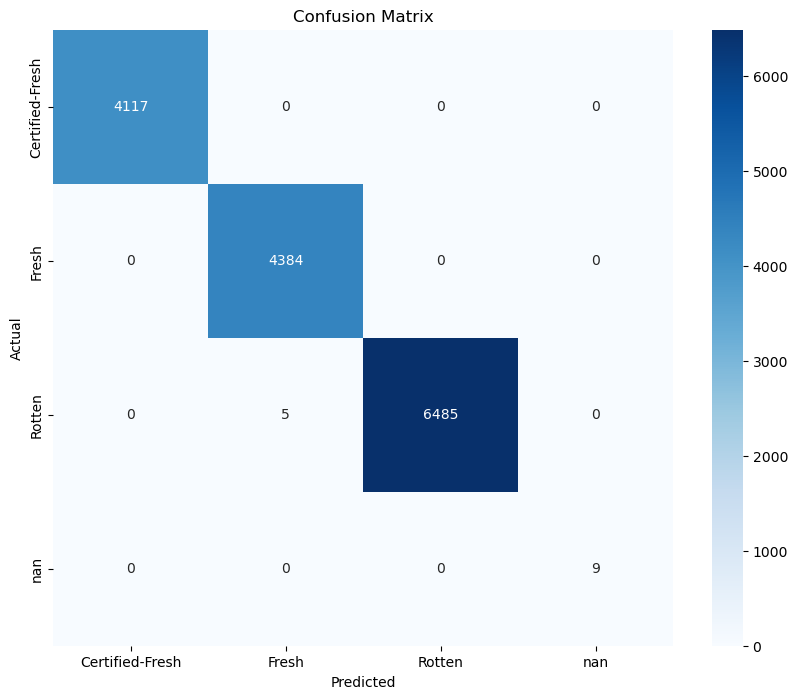

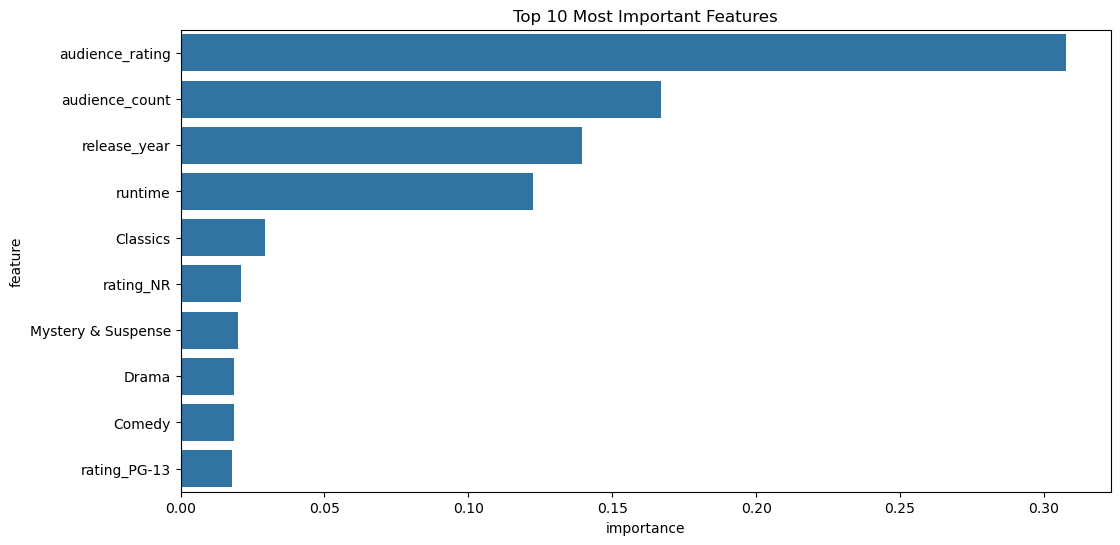

In [9]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


feature_importance = pd.DataFrame({
    'feature': features.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.show()

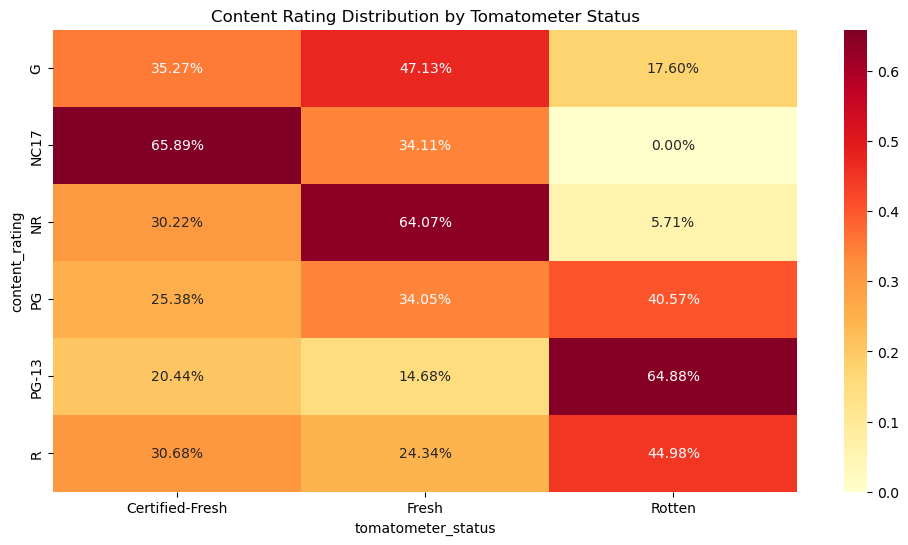

In [10]:
plt.figure(figsize=(12, 6))
content_rating_status = pd.crosstab(df_test['content_rating'], df_test['tomatometer_status'])
content_rating_status_pct = content_rating_status.div(content_rating_status.sum(axis=1), axis=0)
sns.heatmap(content_rating_status_pct, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('Content Rating Distribution by Tomatometer Status')
plt.show()

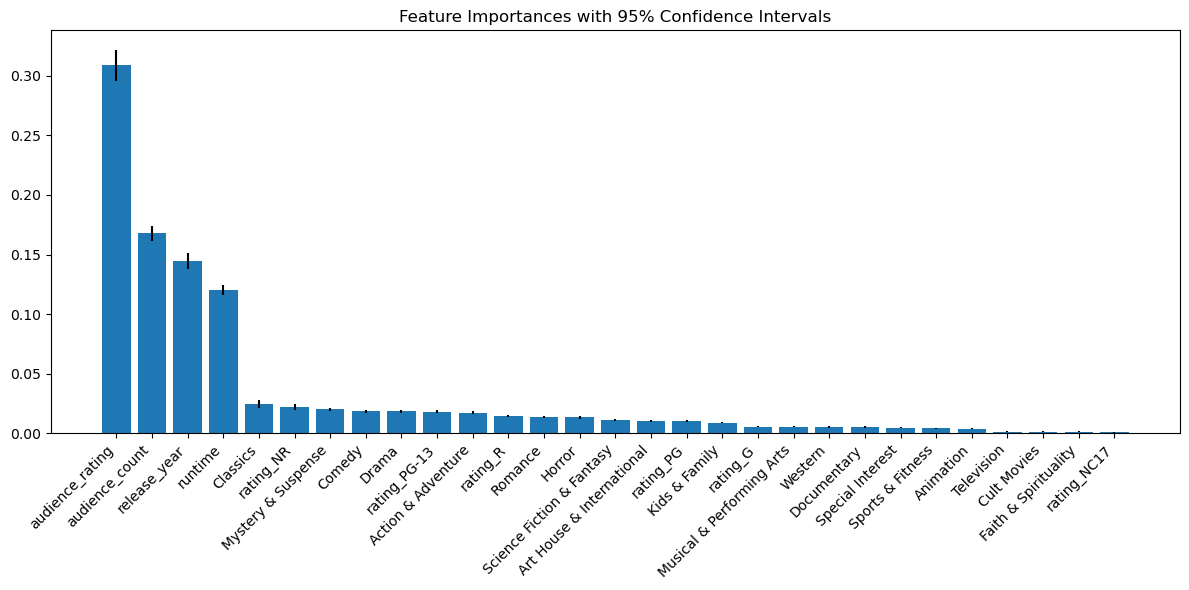

In [11]:
def plot_feature_importance_with_ci(model, feature_names, n_iterations=100):
    importances = []
    for i in range(n_iterations):
        # print(i)
        # Bootstrapping
        indices = np.random.randint(0, len(X_train), len(X_train))
        bootstrap_model = RandomForestClassifier(n_estimators=100, random_state=i)
        bootstrap_model.fit(X_train.iloc[indices], y_train[indices])
        importances.append(bootstrap_model.feature_importances_)
    
    # Gets important features and summary stats
    importances = np.array(importances)
    

    mean_imp = np.mean(importances, axis=0)
    std_imp = np.std(importances, axis=0)
    
    # Sort
    indices = np.argsort(mean_imp)[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.title('Feature Importances with 95% Confidence Intervals')
    plt.bar(range(len(mean_imp)), mean_imp[indices],
            yerr=1.96*std_imp[indices],
            align='center')
    plt.xticks(range(len(mean_imp)), 
               [feature_names[i] for i in indices], 
               rotation=45, 
               ha='right')
    plt.tight_layout()
    plt.show()


plot_feature_importance_with_ci(rf_model, features.columns, 20)

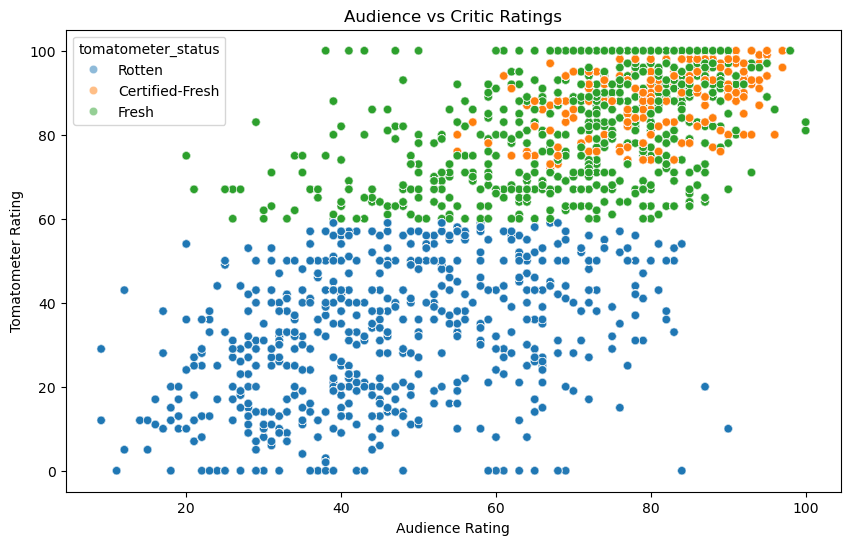

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_test, 
                x='audience_rating', 
                y='tomatometer_rating',
                hue='tomatometer_status',
                alpha=0.5)
plt.title('Audience vs Critic Ratings')
plt.xlabel('Audience Rating')
plt.ylabel('Tomatometer Rating')
plt.show()

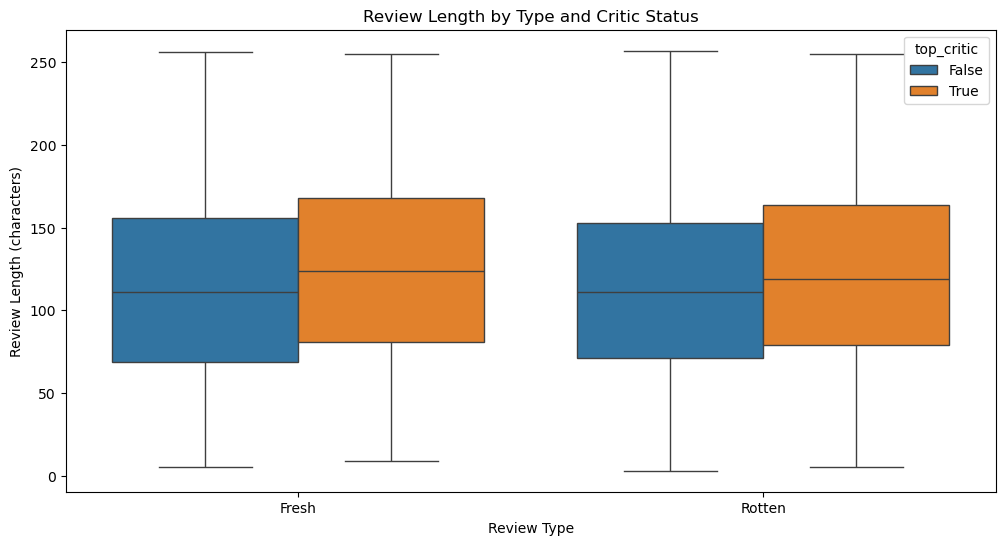

In [13]:
df_test['review_length'] = df_test['review_content'].str.len()
plt.figure(figsize=(12, 6))
sns.boxplot(x='review_type', y='review_length', hue='top_critic', data=df_test)
plt.title('Review Length by Type and Critic Status')
plt.xlabel('Review Type')
plt.ylabel('Review Length (characters)')
plt.show()

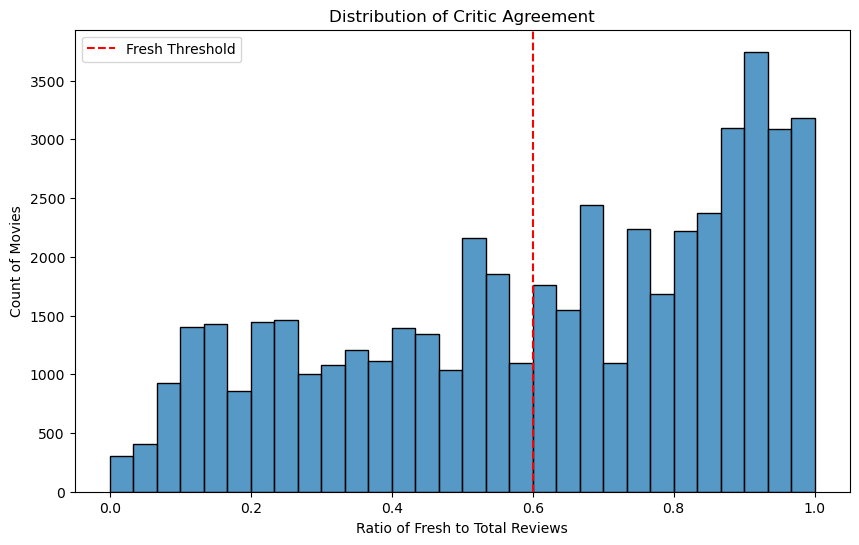

In [14]:
plt.figure(figsize=(10, 6))
agreement_ratio = df_test['tomatometer_fresh_critics_count'] / (df_test['tomatometer_fresh_critics_count'] + df_test['tomatometer_rotten_critics_count'])
sns.histplot(data=agreement_ratio, bins=30)
plt.title('Distribution of Critic Agreement')
plt.xlabel('Ratio of Fresh to Total Reviews')
plt.ylabel('Count of Movies')
plt.axvline(0.6, color='red', linestyle='--', label='Fresh Threshold')
plt.legend()
plt.show()

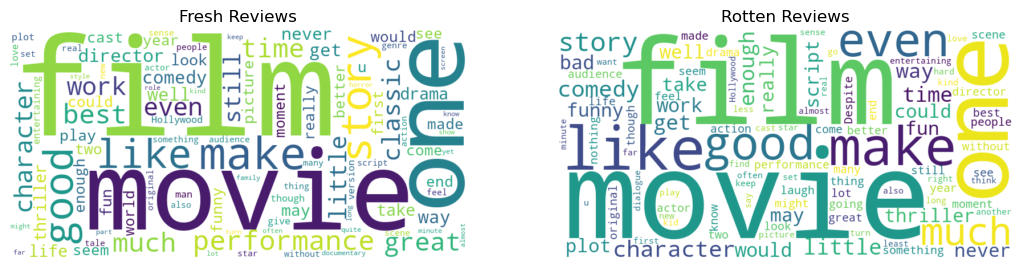

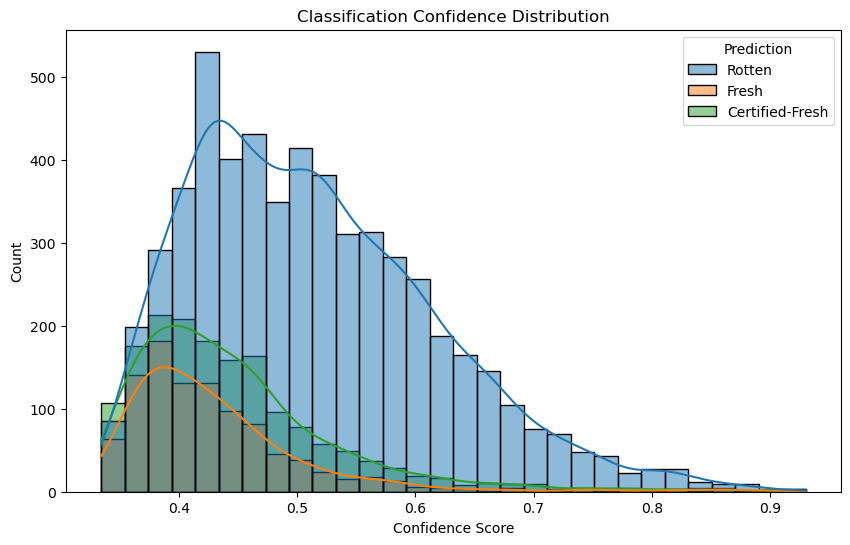

In [15]:
# NLP
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

reviews_df = df_test.dropna(subset=['review_content', 'tomatometer_status'])


fresh_reviews = reviews_df[reviews_df['tomatometer_status'] == 'Fresh']['review_content']
rotten_reviews = reviews_df[reviews_df['tomatometer_status'] == 'Rotten']['review_content']
certified_reviews = reviews_df[reviews_df['tomatometer_status'] == 'Certified Fresh']['review_content']


plt.figure(figsize=(20, 6))

# words
def plot_wordcloud(text_data, title, position):
    wordcloud = WordCloud(width=800, height=400,
                         background_color='white',
                         stopwords=set(stopwords.words('english')),
                         max_words=100).generate(' '.join(text_data))
    
    plt.subplot(1, 3, position)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)


plot_wordcloud(fresh_reviews, 'Fresh Reviews', 1)
plot_wordcloud(rotten_reviews, 'Rotten Reviews', 2)
plt.show()

vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(reviews_df['review_content'])
y = reviews_df['tomatometer_status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# too lazy
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


review_probs = clf.predict_proba(X_test)
confidence_scores = np.max(review_probs, axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(data=pd.DataFrame({
    'Confidence': confidence_scores,
    'Prediction': y_pred,
}), x='Confidence', hue='Prediction', bins=30, kde=True)
plt.title('Classification Confidence Distribution')
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.show()

Model Performance Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4117
           1       1.00      1.00      1.00      4384
           2       1.00      1.00      1.00      6490
           3       1.00      1.00      1.00         9

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000


Accuracy Score:
0.9978666666666667


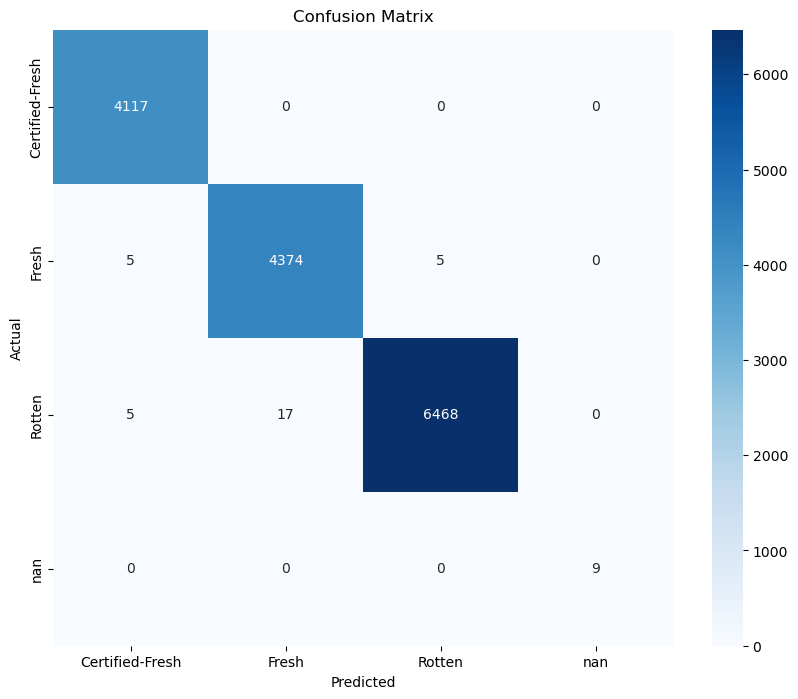

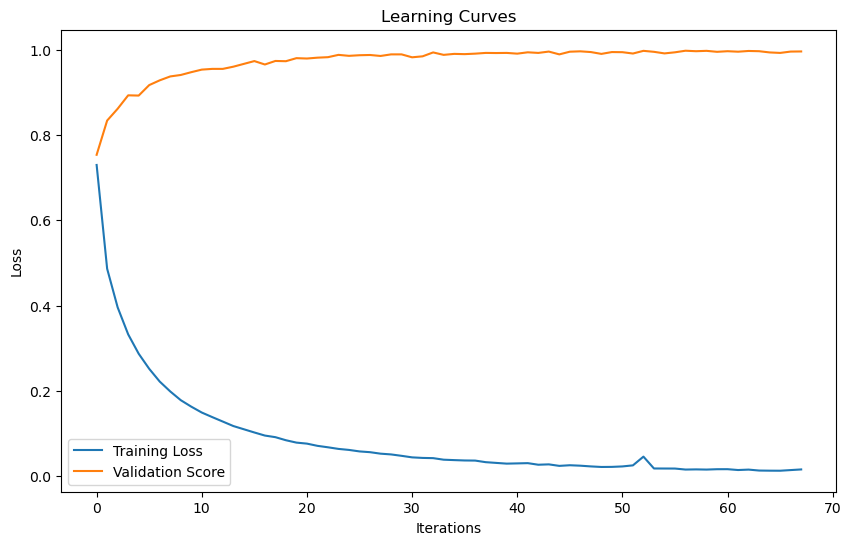

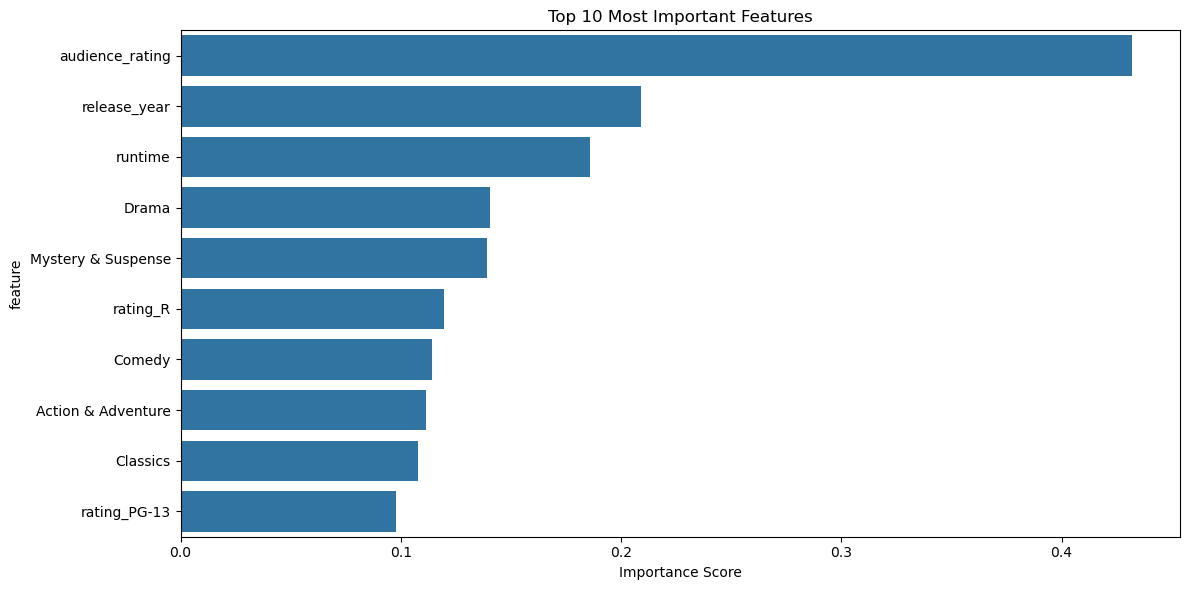


Cross-validation Scores:
Mean CV Accuracy: 0.5653 (± 0.0743)


In [16]:
numerical_features = ['audience_rating', 'audience_count', 'runtime', 'release_year']
X = pd.concat([
    df_test[numerical_features],
    genres,  
    content_rating_dummies  
], axis=1)


X = X.fillna(X.mean())


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

le = LabelEncoder()
y = le.fit_transform(df_test['tomatometer_status'])


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


mlp = MLPClassifier(
    # (100, 50), (50, 25), (25, 10), (200, 100, 50), (100, 100, 100)
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)


mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)

print("Model Performance Metrics:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# cm
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# curves
plt.figure(figsize=(10, 6))
plt.plot(mlp.loss_curve_, label='Training Loss')
if hasattr(mlp, 'validation_scores_'):
    plt.plot(mlp.validation_scores_, label='Validation Score')
plt.title('Learning Curves')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# importance
from sklearn.inspection import permutation_importance

result = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=42)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': result.importances_mean})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()




cv_scores = cross_val_score(mlp, X_scaled, y, cv=5)
print("\nCross-validation Scores:")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (± {cv_scores.std() * 2:.4f})")


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b14d6ac1-b584-4e90-810f-f88d3e20a412' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [17]:
# DO MLP
# !pip install -U sentence-transformers

In [18]:
# combined_df["review_content"]
rows_with_reviews = combined_df[combined_df["review_content"].apply(lambda x: isinstance(x, str))]
rows_with_reviews["review_content"]

0        A fantasy adventure that fuses Greek mythology...
1        Uma Thurman as Medusa, the gorgon with a coiff...
2        With a top-notch cast and dazzling special eff...
3        Whether audiences will get behind The Lightnin...
4        What's really lacking in The Lightning Thief i...
                               ...                        
49995    The smarter an Arnold Schwarzenegger movie tri...
49996                                  A relative letdown.
49997    The movie straddles the fence between escapism...
49998    Enough similarities to Gymkata and Howie Long'...
49999    Age, and a steady diet of Republican conservat...
Name: review_content, Length: 41195, dtype: object

In [19]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(list(rows_with_reviews["review_content"]))
embeddings

2025-03-11 14:46:46.565657: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-11 14:46:46.566185: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 14:46:46.568740: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 14:46:46.575350: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741729606.586031   12659 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741729606.58

array([[ 0.04883504,  0.01799398,  0.016999  , ..., -0.06705526,
        -0.08763077, -0.01252021],
       [ 0.02920385,  0.0310114 , -0.01824762, ..., -0.04588376,
        -0.02058507,  0.00283985],
       [-0.04493874,  0.00036119,  0.07173352, ..., -0.05819787,
         0.0120176 ,  0.07391044],
       ...,
       [ 0.02528979,  0.01970946, -0.04177934, ...,  0.05782781,
        -0.00172464, -0.00787245],
       [-0.0492078 ,  0.00704679,  0.01875528, ...,  0.01784595,
        -0.06193075, -0.02342958],
       [ 0.04407867,  0.00237666, -0.07808131, ..., -0.06859068,
         0.05623451, -0.02676589]], dtype=float32)

In [20]:
embeddings.shape

(41195, 384)

In [21]:
numerical_features = ['audience_rating', 'audience_count', 'runtime']
features = rows_with_reviews[numerical_features]
features = features.fillna(features.mean())

X = pd.concat([
    features,
    rows_with_reviews['genres'].str.get_dummies(sep=', '),
    pd.get_dummies(rows_with_reviews['content_rating'], prefix='rating'),
], axis=1)
X

,audience_rating,audience_count,runtime,Action & Adventure,Animation,Art House & International,Classics,Comedy,Cult Movies,Documentary,...,Special Interest,Sports & Fitness,Television,Western,rating_G,rating_NC17,rating_NR,rating_PG,rating_PG-13,rating_R
0,53.0,254421.0,119.0,1,0,0,0,1,0,0,...,0,0,0,0,False,False,False,True,False,False
1,53.0,254421.0,119.0,1,0,0,0,1,0,0,...,0,0,0,0,False,False,False,True,False,False
2,53.0,254421.0,119.0,1,0,0,0,1,0,0,...,0,0,0,0,False,False,False,True,False,False
3,53.0,254421.0,119.0,1,0,0,0,1,0,0,...,0,0,0,0,False,False,False,True,False,False
4,53.0,254421.0,119.0,1,0,0,0,1,0,0,...,0,0,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,27.0,79880.0,109.0,1,0,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True
49996,27.0,79880.0,109.0,1,0,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True
49997,27.0,79880.0,109.0,1,0,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True
49998,27.0,79880.0,109.0,1,0,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True


In [22]:
embedding_df = pd.DataFrame(embeddings, columns=[f'emb_{i}' for i in range(embeddings.shape[1])], index=rows_with_reviews.index)
X = pd.concat([X, embedding_df], axis=1)
X

,audience_rating,audience_count,runtime,Action & Adventure,Animation,Art House & International,Classics,Comedy,Cult Movies,Documentary,...,emb_374,emb_375,emb_376,emb_377,emb_378,emb_379,emb_380,emb_381,emb_382,emb_383
0,53.0,254421.0,119.0,1,0,0,0,1,0,0,...,0.104048,-0.089232,0.009549,0.084072,-0.090701,0.003389,0.059233,-0.067055,-0.087631,-0.012520
1,53.0,254421.0,119.0,1,0,0,0,1,0,0,...,-0.039872,-0.032058,0.047315,0.100537,-0.158244,0.017442,0.111456,-0.045884,-0.020585,0.002840
2,53.0,254421.0,119.0,1,0,0,0,1,0,0,...,0.090177,0.032790,-0.023406,0.140987,0.002451,0.018947,0.106560,-0.058198,0.012018,0.073910
3,53.0,254421.0,119.0,1,0,0,0,1,0,0,...,0.091600,0.073265,-0.010557,0.114489,-0.050130,-0.053524,0.064369,-0.102884,-0.025138,0.093868
4,53.0,254421.0,119.0,1,0,0,0,1,0,0,...,0.061161,0.028787,-0.004933,0.062463,-0.046785,-0.070449,0.126355,-0.037673,-0.025872,0.067156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,27.0,79880.0,109.0,1,0,0,0,0,0,0,...,0.089093,-0.053498,-0.122369,0.041823,-0.143486,0.047495,0.094982,0.079180,0.063909,0.027662
49996,27.0,79880.0,109.0,1,0,0,0,0,0,0,...,0.064245,-0.000002,-0.052258,0.010972,-0.122125,0.031371,-0.031650,0.024821,0.055951,0.055517
49997,27.0,79880.0,109.0,1,0,0,0,0,0,0,...,-0.010796,0.005773,-0.030074,0.097316,-0.057947,-0.006780,0.071120,0.057828,-0.001725,-0.007872
49998,27.0,79880.0,109.0,1,0,0,0,0,0,0,...,0.011619,0.052904,-0.045151,0.025237,0.045075,-0.014818,0.081334,0.017846,-0.061931,-0.023430


In [23]:
target = le.fit_transform(rows_with_reviews['tomatometer_status'])
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=42)

In [24]:
mlp_nlp = MLPClassifier(
    # (100, 50), (50, 25), (25, 10), (200, 100, 50), (100, 100, 100)
    hidden_layer_sizes=(200, 100, 100),
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)
mlp_nlp.fit(X_train, y_train)
mlp_nlp

MLPClassifier(early_stopping=True, hidden_layer_sizes=(200, 100, 100),
              max_iter=1000, random_state=42)

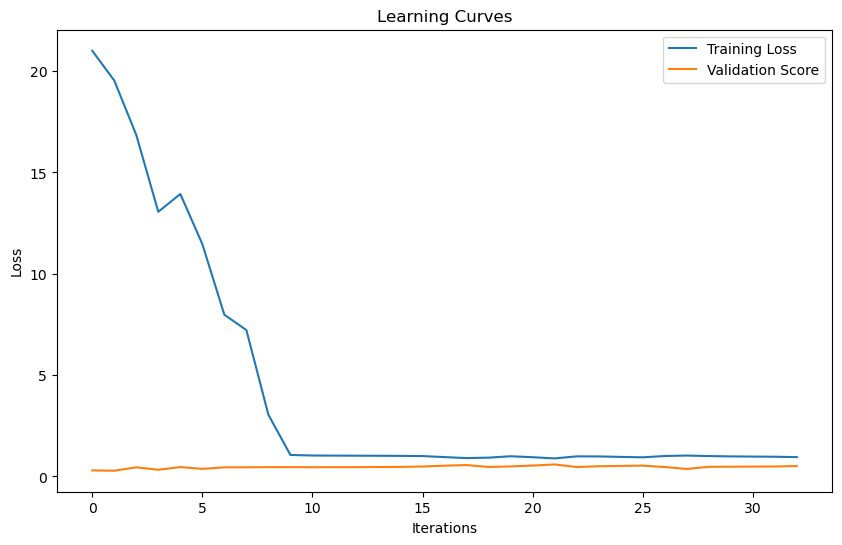

In [25]:
# curves
plt.figure(figsize=(10, 6))
plt.plot(mlp_nlp.loss_curve_, label='Training Loss')
if hasattr(mlp_nlp, 'validation_scores_'):
    plt.plot(mlp_nlp.validation_scores_, label='Validation Score')
plt.title('Learning Curves')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
y_pred = mlp_nlp.predict(X_test)
y_prob = mlp_nlp.predict_proba(X_test)

print("Model Performance Metrics:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Model Performance Metrics:

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.22      0.33      3608
           1       0.60      0.48      0.53      3399
           2       0.58      0.92      0.71      5342
           3       0.00      0.00      0.00        10

    accuracy                           0.59     12359
   macro avg       0.45      0.40      0.39     12359
weighted avg       0.60      0.59      0.55     12359


Accuracy Score:
0.5923618415729428


/home/dante/.local/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dante/.local/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/dante/.local/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r